# Session 1: Foundations of Event Studies

## Event Studies in Finance and Economics - Summer School

---

### Learning Objectives

By the end of this session, you will be able to:

1. Explain the economic logic underlying event study methodology
2. Identify the key components of an event study design
3. Distinguish between different types of corporate and economic events
4. Implement a basic event study for a single firm and event
5. Interpret abnormal returns in economic terms

---

## 1. Introduction: What is an Event Study?

An **event study** is an empirical methodology used to assess the impact of a specific event on the value of a firm (or more generally, on asset prices). The fundamental premise is elegantly simple: if markets are efficient, the impact of an event will be reflected immediately in asset prices.

### The Core Insight

Consider a firm that announces unexpected positive earnings. Under the efficient market hypothesis, this new information should be rapidly incorporated into the stock price. The event study methodology allows us to:

1. **Isolate** the price change attributable to the specific event
2. **Quantify** the economic magnitude of the event's impact
3. **Test** hypotheses about how markets process information

### Why Event Studies Matter

Event studies serve multiple purposes in financial economics:

- **Market Efficiency Tests**: Do prices adjust quickly and correctly to new information?
- **Corporate Finance**: What is the wealth effect of corporate decisions (M&A, dividends, capital structure)?
- **Policy Analysis**: How do regulatory changes or policy announcements affect asset values?
- **Legal Applications**: Quantifying damages in securities litigation

## 2. Historical Development

### The Pioneering Studies

The event study methodology emerged from two seminal papers in the late 1960s:

**Ball and Brown (1968)** - "An Empirical Evaluation of Accounting Income Numbers"
- Examined whether accounting earnings convey useful information to investors
- Found that stock prices adjust in the direction of earnings surprises
- Demonstrated that most adjustment occurs before the announcement (anticipation)

**Fama, Fisher, Jensen, and Roll (1969)** - "The Adjustment of Stock Prices to New Information"
- Studied stock splits and their information content
- Introduced the market model for estimating normal returns
- Established the template that most subsequent event studies follow

### Evolution of the Methodology

| Decade | Key Developments |
|--------|------------------|
| 1970s | Standardization of methodology; focus on market efficiency |
| 1980s | Refinements in statistical testing (Patell, Brown-Warner) |
| 1990s | Long-horizon event studies; concerns about specification |
| 2000s | Cross-sectional analysis; robust inference methods |
| 2010s+ | High-frequency studies; machine learning applications |

## 3. The Anatomy of an Event Study

### Timeline Structure

Every event study involves a carefully defined timeline:

```
        Estimation Window          Event Window       Post-Event Window
    |------------------------|    |----------|      |----------------|
    T₀                      T₁   τ₁    τ    τ₂     T₂              T₃
    
    |<----- L₁ days ------->|    |<-- L₂ -->|      |<---- L₃ ----->|
```

Where:
- **τ** = Event date (day 0)
- **Estimation window** [T₀, T₁]: Used to estimate the "normal" relationship between stock and market returns
- **Event window** [τ₁, τ₂]: Period over which we measure the event's impact (often [-1, +1] or [-5, +5])
- **Post-event window** [T₂, T₃]: Optional; used for long-horizon studies

### Key Design Choices

1. **Event Definition**: What constitutes the event? When exactly did it occur?
2. **Event Window Length**: Should we look at just day 0, or include surrounding days?
3. **Estimation Window Length**: Typically 120-250 trading days
4. **Gap Between Windows**: Often a small gap is left to prevent event contamination

## 4. The Mathematical Framework

### Defining Abnormal Returns

The abnormal return is the difference between the actual return and the "normal" (expected) return:

$$AR_{i,t} = R_{i,t} - E[R_{i,t} | X_t]$$

Where:
- $AR_{i,t}$ = Abnormal return of firm $i$ on day $t$
- $R_{i,t}$ = Actual return of firm $i$ on day $t$
- $E[R_{i,t} | X_t]$ = Expected (normal) return given conditioning information $X_t$

### The Market Model

The most common model for normal returns is the **market model**:

$$R_{i,t} = \alpha_i + \beta_i R_{m,t} + \epsilon_{i,t}$$

Where:
- $R_{m,t}$ = Return on the market portfolio
- $\alpha_i, \beta_i$ = Firm-specific parameters estimated from the estimation window
- $\epsilon_{i,t} \sim N(0, \sigma^2_{\epsilon_i})$

The expected return during the event window is then:

$$E[R_{i,t} | R_{m,t}] = \hat{\alpha}_i + \hat{\beta}_i R_{m,t}$$

And the abnormal return:

$$AR_{i,t} = R_{i,t} - \hat{\alpha}_i - \hat{\beta}_i R_{m,t}$$

### Cumulative Abnormal Returns (CAR)

To capture the total effect over an event window, we sum abnormal returns:

$$CAR_i(\tau_1, \tau_2) = \sum_{t=\tau_1}^{\tau_2} AR_{i,t}$$

For example, $CAR_i(-1, +1)$ captures the cumulative abnormal return from one day before to one day after the event.

### Aggregating Across Firms

For a sample of $N$ events, the average abnormal return is:

$$\overline{AR}_t = \frac{1}{N} \sum_{i=1}^{N} AR_{i,t}$$

And the cumulative average abnormal return:

$$\overline{CAR}(\tau_1, \tau_2) = \sum_{t=\tau_1}^{\tau_2} \overline{AR}_t$$

## 5. Types of Events

### Firm-Specific Events

| Category | Examples |
|----------|----------|
| **Earnings** | Quarterly announcements, earnings surprises, guidance |
| **Corporate Actions** | Stock splits, dividends, share repurchases |
| **M&A** | Merger announcements, tender offers, hostile bids |
| **Financing** | Equity issuance, debt offerings, credit rating changes |
| **Governance** | CEO changes, board appointments, activist involvement |
| **Legal/Regulatory** | Lawsuits, FDA approvals, patent grants |

### Market-Wide Events

| Category | Examples |
|----------|----------|
| **Monetary Policy** | Interest rate decisions, QE announcements |
| **Fiscal Policy** | Tax changes, stimulus packages |
| **Regulation** | New rules, deregulation, sanctions |
| **Political** | Elections, referendums, geopolitical events |
| **Macroeconomic** | Employment reports, GDP releases, inflation data |

### Anticipated vs. Unanticipated Events

A crucial distinction:

- **Anticipated events** (e.g., scheduled earnings announcements): Markets may partially price in expectations before the event
- **Unanticipated events** (e.g., sudden CEO death): Full impact should occur at announcement

For anticipated events, the abnormal return reflects the **surprise component** only.

## 6. Practical Implementation

Let's now implement a basic event study step by step. We'll analyze Apple's stock response to its iPhone 15 announcement in September 2023.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


### Step 1: Define the Event and Parameters

In [3]:
# Event Study Parameters
TICKER = 'AAPL'                    # Apple Inc.
MARKET_INDEX = '^GSPC'             # S&P 500 as market proxy
EVENT_DATE = '2023-09-12'          # iPhone 15 announcement date

# Window specifications (in trading days)
ESTIMATION_WINDOW = 120            # Days in estimation window
GAP = 10                           # Gap between estimation and event window
EVENT_WINDOW_PRE = 5               # Days before event
EVENT_WINDOW_POST = 5              # Days after event

print(f"Event Study Configuration:")
print(f"  Stock: {TICKER}")
print(f"  Market Index: {MARKET_INDEX}")
print(f"  Event Date: {EVENT_DATE}")
print(f"  Estimation Window: {ESTIMATION_WINDOW} trading days")
print(f"  Event Window: [{-EVENT_WINDOW_PRE}, +{EVENT_WINDOW_POST}]")

Event Study Configuration:
  Stock: AAPL
  Market Index: ^GSPC
  Event Date: 2023-09-12
  Estimation Window: 120 trading days
  Event Window: [-5, +5]


### Step 2: Download Price Data

In [6]:
def download_data(ticker, market, event_date, est_window, gap, pre, post):
    """
    Download stock and market data for event study.
    
    Parameters:
    -----------
    ticker : str
        Stock ticker symbol
    market : str
        Market index ticker
    event_date : str
        Event date in 'YYYY-MM-DD' format
    est_window : int
        Length of estimation window in trading days
    gap : int
        Gap between estimation and event window
    pre : int
        Days before event in event window
    post : int
        Days after event in event window
    
    Returns:
    --------
    pd.DataFrame with columns ['stock_ret', 'market_ret', 'event_time']
    """
    # Calculate date range (add buffer for weekends/holidays)
    event_dt = pd.to_datetime(event_date)
    start_date = event_dt - timedelta(days=int((est_window + gap + pre) * 1.5))
    end_date = event_dt + timedelta(days=int(post * 2))
    
    # Download data
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    market_data = yf.download(market, start=start_date, end=end_date, progress=False)
    
    # Calculate returns
    df = pd.DataFrame({
        'stock_price': stock_data['Close'].squeeze(),
        'market_price': market_data['Close'].squeeze()
    })
    
    df['stock_ret'] = df['stock_price'].pct_change()
    df['market_ret'] = df['market_price'].pct_change()
    df = df.dropna()
    
    # Find event date in the data (might be adjusted if not a trading day)
    if event_dt not in df.index:
        # Find nearest trading day
        idx = df.index.get_indexer([event_dt], method='nearest')[0]
        event_dt = df.index[idx]
        print(f"  Note: Event date adjusted to nearest trading day: {event_dt.date()}")
    
    # Create event time index
    event_idx = df.index.get_loc(event_dt)
    df['event_time'] = range(-event_idx, len(df) - event_idx)
    
    return df, event_dt

# Download data
data, actual_event_date = download_data(
    TICKER, MARKET_INDEX, EVENT_DATE,
    ESTIMATION_WINDOW, GAP, EVENT_WINDOW_PRE, EVENT_WINDOW_POST
)

print(f"\nData downloaded: {len(data)} trading days")
print(f"Date range: {data.index[0].date()} to {data.index[-1].date()}")
data.head()

YF.download() has changed argument auto_adjust default to True

Data downloaded: 146 trading days
Date range: 2023-02-23 to 2023-09-21


,stock_price,market_price,stock_ret,market_ret,event_time
Date,,,,,
2023-02-23,147.404327,4012.320068,0.003290,0.005329,-138
2023-02-24,144.750259,3970.040039,-0.018005,-0.010538,-137
2023-02-27,145.944077,3982.239990,0.008247,0.003073,-136
2023-02-28,145.440918,3970.149902,-0.003448,-0.003036,-135
2023-03-01,143.368958,3951.389893,-0.014246,-0.004725,-134


### Step 3: Define Windows

In [8]:
def define_windows(df, est_window, gap, pre, post):
    """
    Split data into estimation and event windows.
    
    Returns:
    --------
    estimation_data, event_data : pd.DataFrame
    """
    # Estimation window: ends 'gap' days before event window starts
    est_end = -(gap + pre)
    est_start = est_end - est_window
    
    # Event window
    evt_start = -pre
    evt_end = post
    
    estimation_data = df[(df['event_time'] >= est_start) & (df['event_time'] < est_end)].copy()
    event_data = df[(df['event_time'] >= evt_start) & (df['event_time'] <= evt_end)].copy()
    
    print(f"Estimation Window:")
    print(f"  Event time: [{est_start}, {est_end})")
    print(f"  Dates: {estimation_data.index[0].date()} to {estimation_data.index[-1].date()}")
    print(f"  Observations: {len(estimation_data)}")
    
    print(f"\nEvent Window:")
    print(f"  Event time: [{evt_start}, {evt_end}]")
    print(f"  Dates: {event_data.index[0].date()} to {event_data.index[-1].date()}")
    print(f"  Observations: {len(event_data)}")
    
    return estimation_data, event_data

estimation_data, event_data = define_windows(
    data, ESTIMATION_WINDOW, GAP, EVENT_WINDOW_PRE, EVENT_WINDOW_POST
)

Estimation Window:
  Event time: [-135, -15)
  Dates: 2023-02-28 to 2023-08-18
  Observations: 120

Event Window:
  Event time: [-5, 5]
  Dates: 2023-09-05 to 2023-09-19
  Observations: 11


### Step 4: Estimate the Market Model

In [10]:
def estimate_market_model(estimation_data):
    """
    Estimate market model parameters using OLS.
    
    R_i,t = alpha + beta * R_m,t + epsilon_t
    
    Returns:
    --------
    dict with 'alpha', 'beta', 'sigma', 'r_squared'
    """
    y = estimation_data['stock_ret'].values
    x = estimation_data['market_ret'].values
    
    # Add constant for alpha
    X = np.column_stack([np.ones(len(x)), x])
    
    # OLS estimation
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    alpha = beta_hat[0]
    beta = beta_hat[1]
    
    # Residuals and standard error
    y_pred = alpha + beta * x
    residuals = y - y_pred
    sigma = np.std(residuals, ddof=2)  # Adjust for 2 parameters
    
    # R-squared
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - ss_res / ss_tot
    
    return {
        'alpha': alpha,
        'beta': beta,
        'sigma': sigma,
        'r_squared': r_squared,
        'residuals': residuals
    }

# Estimate model
model = estimate_market_model(estimation_data)

print("Market Model Estimation Results:")
print(f"  α (alpha) = {model['alpha']:.6f}")
print(f"  β (beta)  = {model['beta']:.4f}")
print(f"  σ (sigma) = {model['sigma']:.6f}")
print(f"  R²        = {model['r_squared']:.4f}")
print(f"\nInterpretation:")
print(f"  - Beta of {model['beta']:.2f} indicates the stock is ", end="")
if model['beta'] > 1:
    print(f"more volatile than the market")
elif model['beta'] < 1:
    print(f"less volatile than the market")
else:
    print(f"as volatile as the market")

Market Model Estimation Results:
  α (alpha) = 0.000582
  β (beta)  = 1.1072
  σ (sigma) = 0.008476
  R²        = 0.5215

Interpretation:
  - Beta of 1.11 indicates the stock is more volatile than the market


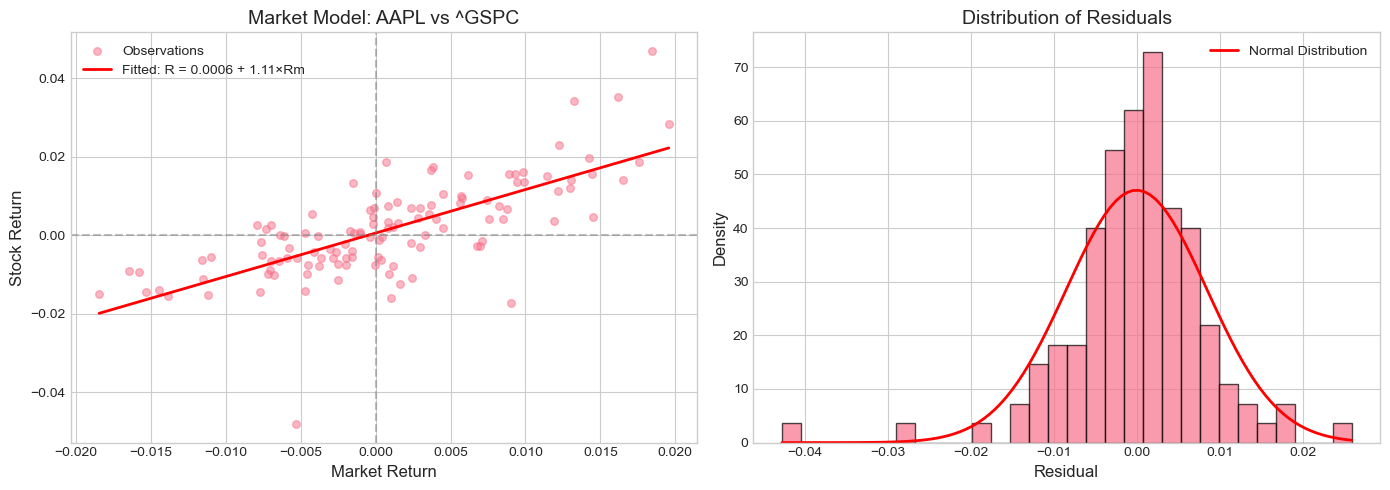

In [12]:
# Visualize the market model fit
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot with regression line
ax1 = axes[0]
ax1.scatter(estimation_data['market_ret'], estimation_data['stock_ret'], 
            alpha=0.5, s=30, label='Observations')

x_line = np.linspace(estimation_data['market_ret'].min(), estimation_data['market_ret'].max(), 100)
y_line = model['alpha'] + model['beta'] * x_line
ax1.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fitted: R = {model["alpha"]:.4f} + {model["beta"]:.2f}×Rm')

ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Market Return', fontsize=12)
ax1.set_ylabel('Stock Return', fontsize=12)
ax1.set_title(f'Market Model: {TICKER} vs {MARKET_INDEX}', fontsize=14)
ax1.legend()

# Residual distribution
ax2 = axes[1]
ax2.hist(model['residuals'], bins=30, density=True, alpha=0.7, edgecolor='black')

# Overlay normal distribution
x_norm = np.linspace(model['residuals'].min(), model['residuals'].max(), 100)
y_norm = stats.norm.pdf(x_norm, 0, model['sigma'])
ax2.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution')

ax2.set_xlabel('Residual', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Distribution of Residuals', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

### Step 5: Calculate Abnormal Returns

In [14]:
def calculate_abnormal_returns(event_data, model):
    """
    Calculate abnormal returns during the event window.
    
    AR_t = R_t - (alpha + beta * R_m,t)
    
    Returns:
    --------
    pd.DataFrame with abnormal returns and related statistics
    """
    result = event_data.copy()
    
    # Expected (normal) returns
    result['expected_ret'] = model['alpha'] + model['beta'] * result['market_ret']
    
    # Abnormal returns
    result['AR'] = result['stock_ret'] - result['expected_ret']
    
    # Cumulative abnormal return (from start of event window)
    result['CAR'] = result['AR'].cumsum()
    
    return result

# Calculate abnormal returns
event_results = calculate_abnormal_returns(event_data, model)

# Display results
display_cols = ['event_time', 'stock_ret', 'market_ret', 'expected_ret', 'AR', 'CAR']
print("Event Window Results:")
print("="*80)
event_results_display = event_results[display_cols].copy()
event_results_display.index = event_results_display.index.strftime('%Y-%m-%d')

# Format as percentages
for col in ['stock_ret', 'market_ret', 'expected_ret', 'AR', 'CAR']:
    event_results_display[col] = event_results_display[col].apply(lambda x: f"{x*100:.2f}%")

print(event_results_display.to_string())

Event Window Results:
            event_time stock_ret market_ret expected_ret      AR     CAR
Date                                                                    
2023-09-05          -5     0.13%     -0.42%       -0.41%   0.53%   0.53%
2023-09-06          -4    -3.58%     -0.70%       -0.71%  -2.87%  -2.33%
2023-09-07          -3    -2.92%     -0.32%       -0.30%  -2.63%  -4.96%
2023-09-08          -2     0.35%      0.14%        0.22%   0.13%  -4.83%
2023-09-11          -1     0.66%      0.67%        0.80%  -0.14%  -4.97%
2023-09-12           0    -1.71%     -0.57%       -0.57%  -1.13%  -6.10%
2023-09-13           1    -1.19%      0.12%        0.20%  -1.38%  -7.48%
2023-09-14           2     0.88%      0.84%        0.99%  -0.11%  -7.60%
2023-09-15           3    -0.42%     -1.22%       -1.29%   0.87%  -6.72%
2023-09-18           4     1.69%      0.07%        0.14%   1.55%  -5.17%
2023-09-19           5     0.62%     -0.22%       -0.18%   0.80%  -4.37%


### Step 6: Visualize Results

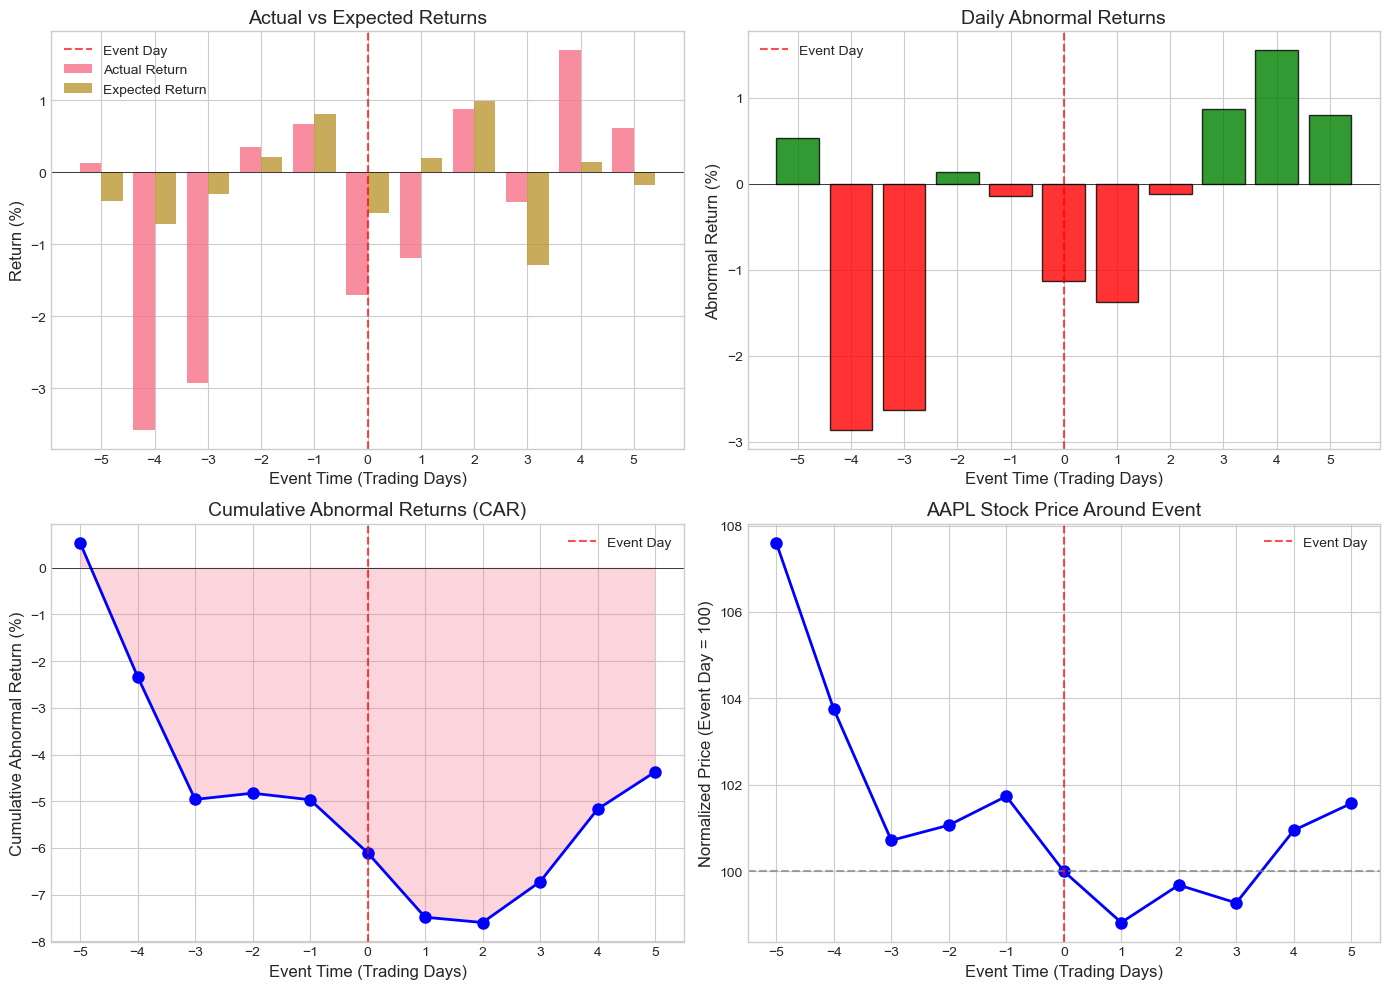

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

event_time = event_results['event_time'].values

# Plot 1: Actual vs Expected Returns
ax1 = axes[0, 0]
ax1.bar(event_time - 0.2, event_results['stock_ret']*100, 0.4, label='Actual Return', alpha=0.8)
ax1.bar(event_time + 0.2, event_results['expected_ret']*100, 0.4, label='Expected Return', alpha=0.8)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Event Day')
ax1.set_xlabel('Event Time (Trading Days)', fontsize=12)
ax1.set_ylabel('Return (%)', fontsize=12)
ax1.set_title('Actual vs Expected Returns', fontsize=14)
ax1.legend()
ax1.set_xticks(event_time)

# Plot 2: Abnormal Returns
ax2 = axes[0, 1]
colors = ['green' if ar >= 0 else 'red' for ar in event_results['AR']]
ax2.bar(event_time, event_results['AR']*100, color=colors, alpha=0.8, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Event Day')
ax2.set_xlabel('Event Time (Trading Days)', fontsize=12)
ax2.set_ylabel('Abnormal Return (%)', fontsize=12)
ax2.set_title('Daily Abnormal Returns', fontsize=14)
ax2.legend()
ax2.set_xticks(event_time)

# Plot 3: Cumulative Abnormal Returns
ax3 = axes[1, 0]
ax3.plot(event_time, event_results['CAR']*100, 'b-o', linewidth=2, markersize=8)
ax3.fill_between(event_time, 0, event_results['CAR']*100, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Event Day')
ax3.set_xlabel('Event Time (Trading Days)', fontsize=12)
ax3.set_ylabel('Cumulative Abnormal Return (%)', fontsize=12)
ax3.set_title('Cumulative Abnormal Returns (CAR)', fontsize=14)
ax3.legend()
ax3.set_xticks(event_time)

# Plot 4: Stock Price Around Event
ax4 = axes[1, 1]
# Normalize price to 100 at event day
event_idx = event_results[event_results['event_time'] == 0].index[0]
base_price = event_results.loc[event_idx, 'stock_price']
normalized_price = (event_results['stock_price'] / base_price) * 100

ax4.plot(event_time, normalized_price, 'b-o', linewidth=2, markersize=8)
ax4.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Event Day')
ax4.set_xlabel('Event Time (Trading Days)', fontsize=12)
ax4.set_ylabel('Normalized Price (Event Day = 100)', fontsize=12)
ax4.set_title(f'{TICKER} Stock Price Around Event', fontsize=14)
ax4.legend()
ax4.set_xticks(event_time)

plt.tight_layout()
plt.show()

### Step 7: Statistical Testing (Preview)

For a single event, we can perform a simple t-test to assess whether abnormal returns are statistically significant. More sophisticated tests will be covered in Sessions 4 and 5.

In [18]:
def simple_significance_test(event_results, model, windows=None):
    """
    Perform simple t-test for abnormal returns.
    
    Under the null hypothesis of no abnormal returns:
    t = AR / sigma ~ t(T-2)
    
    For CAR:
    t = CAR / (sigma * sqrt(L)) where L is the window length
    """
    sigma = model['sigma']
    
    if windows is None:
        windows = [(-1, 1), (0, 0), (-5, 5)]
    
    print("Statistical Significance Tests")
    print("="*60)
    
    results = []
    
    for w_start, w_end in windows:
        mask = (event_results['event_time'] >= w_start) & (event_results['event_time'] <= w_end)
        window_data = event_results[mask]
        
        car = window_data['AR'].sum()
        window_length = len(window_data)
        
        # Standard error of CAR (assuming independence)
        se_car = sigma * np.sqrt(window_length)
        
        # t-statistic
        t_stat = car / se_car
        
        # p-value (two-tailed)
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=ESTIMATION_WINDOW-2))
        
        print(f"\nWindow [{w_start:+d}, {w_end:+d}]:")
        print(f"  CAR      = {car*100:+.2f}%")
        print(f"  Std.Err  = {se_car*100:.2f}%")
        print(f"  t-stat   = {t_stat:.3f}")
        print(f"  p-value  = {p_value:.4f}", end="")
        if p_value < 0.01:
            print(" ***")
        elif p_value < 0.05:
            print(" **")
        elif p_value < 0.10:
            print(" *")
        else:
            print("")
        
        results.append({
            'window': f"[{w_start:+d}, {w_end:+d}]",
            'CAR': car,
            't_stat': t_stat,
            'p_value': p_value
        })
    
    print("\n" + "="*60)
    print("Significance levels: *** p<0.01, ** p<0.05, * p<0.10")
    
    return pd.DataFrame(results)

# Run significance tests
test_results = simple_significance_test(
    event_results, model,
    windows=[(-1, 1), (0, 0), (-5, 5), (-2, 2)]
)

Statistical Significance Tests

Window [-1, +1]:
  CAR      = -2.66%
  Std.Err  = 1.47%
  t-stat   = -1.808
  p-value  = 0.0731 *

Window [+0, +0]:
  CAR      = -1.13%
  Std.Err  = 0.85%
  t-stat   = -1.337
  p-value  = 0.1837

Window [-5, +5]:
  CAR      = -4.37%
  Std.Err  = 2.81%
  t-stat   = -1.555
  p-value  = 0.1226

Window [-2, +2]:
  CAR      = -2.64%
  Std.Err  = 1.90%
  t-stat   = -1.391
  p-value  = 0.1670

Significance levels: *** p<0.01, ** p<0.05, * p<0.10


## 7. Interpretation and Caveats

### Interpreting the Results

The abnormal return captures the component of the stock's return that cannot be explained by general market movements. A positive (negative) abnormal return suggests the event created (destroyed) shareholder value.

**Important considerations:**

1. **Single-firm limitation**: With only one event, we cannot separate the event effect from firm-specific noise. Multi-firm samples (covered in Sessions 4-5) provide more robust inference.

2. **Event window choice**: Different windows may yield different conclusions. The choice should be guided by:
   - How quickly information is incorporated (shorter for efficient markets)
   - Whether the event was anticipated (longer window to capture pre-announcement drift)
   - Industry norms and prior research

3. **Confounding events**: Other news during the event window can contaminate our estimates.

4. **Market model assumptions**: The market model assumes a stable relationship between stock and market returns, which may not hold.

## 8. Exercises

### Exercise 1: Different Event
Modify the code to study a different corporate event (e.g., an earnings announcement, M&A deal, or CEO change). Document your findings.

### Exercise 2: Alternative Normal Return Model
Implement the **constant mean return model**:
$$E[R_{i,t}] = \bar{R}_i$$

Compare results with the market model.

### Exercise 3: Sensitivity Analysis
Examine how your results change when you:
- Vary the estimation window length (60, 120, 250 days)
- Use different event windows ([-1,+1], [-3,+3], [-10,+10])
- Change the market index (S&P 500, NASDAQ, sector ETF)

In [ ]:
# Exercise 2 Solution Template: Constant Mean Return Model

def estimate_constant_mean_model(estimation_data):
    """
    Estimate constant mean return model.
    
    E[R_i,t] = mean(R_i) during estimation period
    """
    y = estimation_data['stock_ret'].values
    
    mean_return = np.mean(y)
    residuals = y - mean_return
    sigma = np.std(residuals, ddof=1)
    
    return {
        'mean_return': mean_return,
        'sigma': sigma,
        'residuals': residuals
    }

def calculate_ar_constant_mean(event_data, model):
    """
    Calculate abnormal returns using constant mean model.
    """
    result = event_data.copy()
    result['expected_ret'] = model['mean_return']
    result['AR'] = result['stock_ret'] - result['expected_ret']
    result['CAR'] = result['AR'].cumsum()
    return result

# Your code here to estimate and compare models
# ...

## 9. Summary

In this session, we covered:

1. **The Logic of Event Studies**: Using market efficiency to isolate event impacts

2. **Historical Context**: The foundational work of Ball & Brown (1968) and FFJR (1969)

3. **Timeline Structure**: Estimation window, event window, and their relationship

4. **The Market Model**: Estimating normal returns as a function of market returns

5. **Abnormal Returns**: AR and CAR as measures of event impact

6. **Basic Implementation**: A complete single-event study workflow

### Coming Up Next

**Session 2: The Market Model and Normal Return Estimation** will explore:
- Alternative models for expected returns (CAPM, Fama-French, Carhart)
- Parameter estimation techniques
- Model selection and specification tests
- Handling estimation issues (thin trading, non-synchronous trading)

## 10. References

### Foundational Papers
- Ball, R., & Brown, P. (1968). An empirical evaluation of accounting income numbers. *Journal of Accounting Research*, 6(2), 159-178.
- Fama, E. F., Fisher, L., Jensen, M. C., & Roll, R. (1969). The adjustment of stock prices to new information. *International Economic Review*, 10(1), 1-21.

### Methodological References
- Brown, S. J., & Warner, J. B. (1985). Using daily stock returns: The case of event studies. *Journal of Financial Economics*, 14(1), 3-31.
- MacKinlay, A. C. (1997). Event studies in economics and finance. *Journal of Economic Literature*, 35(1), 13-39.
- Kothari, S. P., & Warner, J. B. (2007). Econometrics of event studies. *Handbook of Corporate Finance*, 1, 3-36.

### Textbooks
- Campbell, J. Y., Lo, A. W., & MacKinlay, A. C. (1997). *The Econometrics of Financial Markets*. Princeton University Press. Chapter 4.